In [3]:
"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

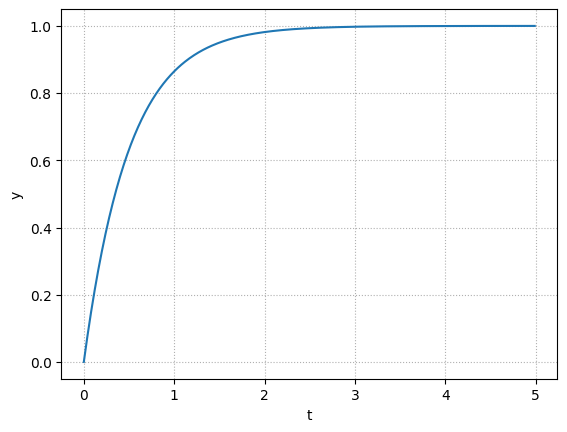

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, step

# 時定数とゲイン
T, K = 0.5, 1

# 伝達関数
P = tf([K], [T, 1])

# ステップ応答を計算
y, t = step(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')


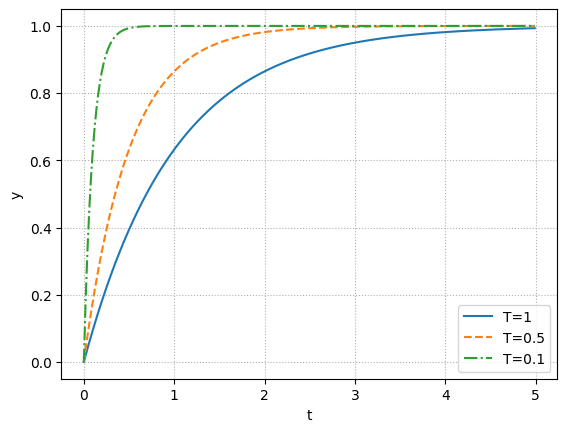

In [12]:
LS = linestyle_generator()
fig, ax = plt.subplots()

K = 1
Ts = [1, 0.5, 0.1]
for T in Ts:
    P = tf([K], [T, 1])
    y, t = step(P, np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(LS), label=f'T={T}')

plot_set(ax, 't', 'y', 'best')

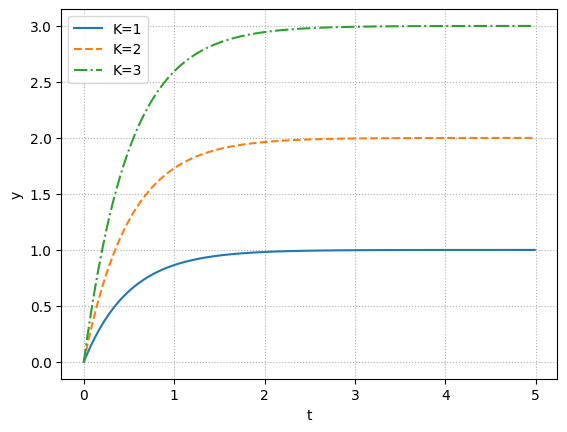

In [15]:
LS = linestyle_generator()
fig, ax = plt.subplots()

Ks = [1, 2, 3]
T = 0.5
for K in Ks:
    P = tf([K], [T, 1])
    y, t = step(P, np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(LS), label=f'K={K}')

plot_set(ax, 't', 'y', 'best')

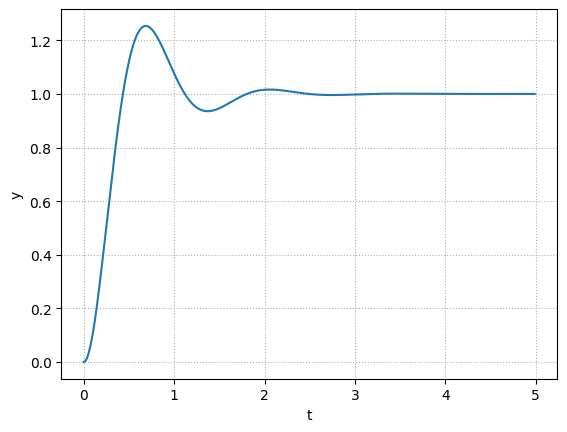

In [16]:
from control.matlab import tf, step

# 減衰係数と固有角周波数
zeta, omega_n = 0.4, 5

# ２次遅れ系の伝達関数
P = tf([omega_n ** 2], [1, 2 * zeta * omega_n, omega_n ** 2])
y, t = step(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')

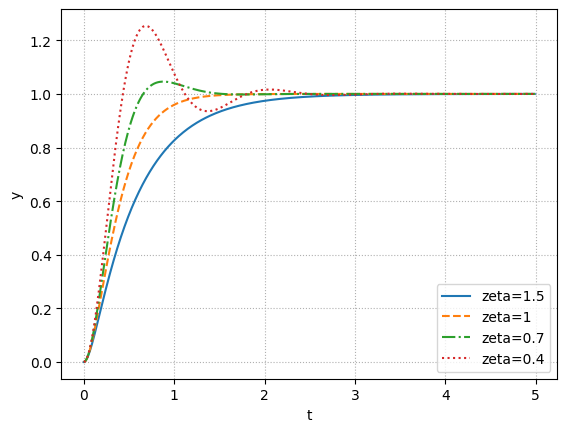

In [20]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zetas = [1.5, 1, 0.7, 0.4]
omega_n = 5
for zeta in zetas:
    P = tf([omega_n ** 2], [1, 2 * zeta * omega_n, omega_n ** 2])
    y, t = step(P, np.arange(0, 5, 0.01))
    pltargs = {'ls': next(LS), 'label': f'zeta={zeta}'}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

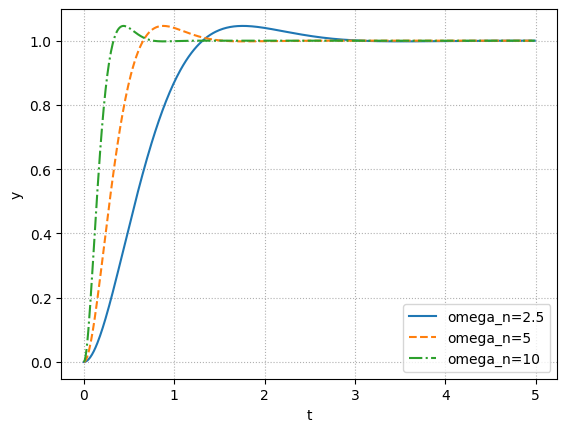

In [25]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = 0.7
omega_ns = [2.5, 5, 10]
for omega_n in omega_ns:
    P = tf([omega_n ** 2], [1, 2 * zeta * omega_n, omega_n ** 2])
    y, t = step(P, np.arange(0, 5, 0.01))
    pltargs = {'ls': next(LS), 'label': f'omega_n={omega_n}'}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

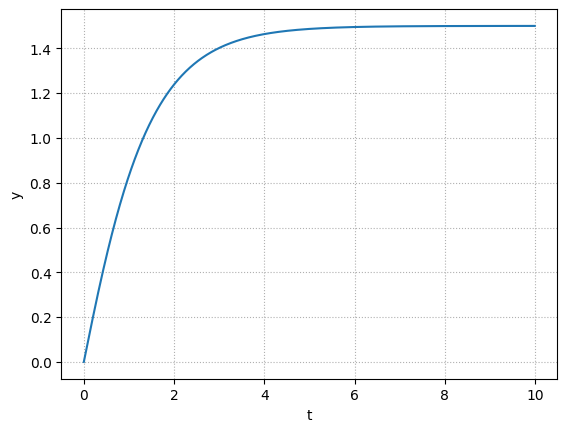

In [28]:
# 練習問題 1
s = tf('s')
P = (s+3)/((s+1)*(s+2))
y, t = step(P, np.arange(0, 10, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')

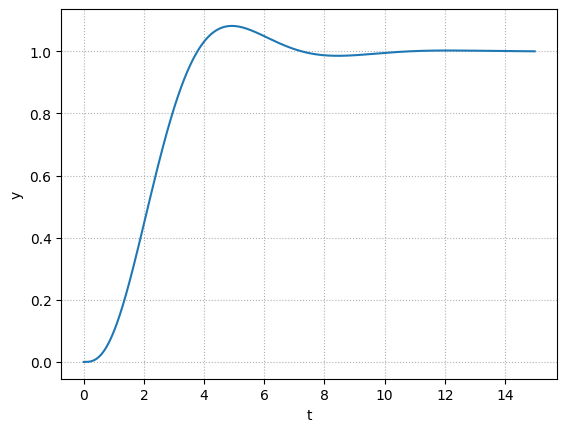

In [30]:
# 練習問題 2
s = tf('s')
P = 1/(s**3 + 2*s**2 + 2*s + 1)
y, t = step(P, np.arange(0, 15, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')